# Police Stop Data EDA for CA Cities

According to the Stanford Open Policing Project, there are typically over 50,000 traffic stops a day in the United States. They have collected and released records from millions of those traffic stops. 

Their website can be found here: https://openpolicing.stanford.edu


In this notebook, I will compare and contrast trends in police stop data for cities in California during 2014. The cities I will compare are: Los Angeles, San Diego, San Francisco, San Jose, Long Beach, Oakland, Bakersfield, and Stockton. 

### The Data: 

The data was available through the Stanford Open Policing Project. The data can be found here: https://openpolicing.stanford.edu/data/

The merged data has 12 fields:  
* Date, time, lat, lng, subject age, subject race, type (vehicular or pedestrian), outcome (warning, citation or arrest), contraband_found, search_conducted, and city. 

* Not all cities had all variables recorded.

* All cities have the date, suject race, type and city variables.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
figsize = (16,8)

In [2]:
# loading the data
df_ca = pd.read_csv('Data/df_ca_2017.csv', low_memory=False)

In [3]:
# taking a first look at the data
df_ca.head()

,Unnamed: 0,date,time,lat,lng,subject_age,subject_race,subject_sex,type,outcome,contraband_found,search_conducted,city
0,0,2017-01-01,10:10:00,37.799366,-122.216793,41.0,white,male,pedestrian,warning,NaN,False,Oakland
1,1,2017-01-01,11:58:00,37.837443,-122.266687,34.0,black,female,vehicular,warning,NaN,False,Oakland
2,2,2017-01-01,11:58:00,37.837443,-122.266687,26.0,black,male,vehicular,warning,NaN,False,Oakland
3,3,2017-01-01,14:45:00,37.760424,-122.189575,19.0,hispanic,male,pedestrian,warning,False,True,Oakland
4,4,2017-01-01,15:16:00,37.773503,-122.200769,28.0,black,male,vehicular,citation,NaN,False,Oakland


In [4]:
# Checking the columns in the dataset
df_ca.columns

Index(['Unnamed: 0', 'date', 'time', 'lat', 'lng', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'outcome', 'contraband_found',
       'search_conducted', 'city'],
      dtype='object')

### Cleaning up the Data

In [5]:
# Unnamed: 0 is the same as the indicies so we can drop it
df_ca = df_ca.drop(['Unnamed: 0'], axis = 1)

In [6]:
# Checking the row counts to see what rows are missing values
# checking the row counts to see what rows are missing values
# A lot of columns are missing a lot of variables, but most we do not end up using, or we only visualize for the specific cities that have the variables
# this means we will fill in most of the variables missing a significant amount of rows
df_ca.count()

date                693980
time                675421
lat                  88133
lng                  88133
subject_age         693980
subject_race        693980
subject_sex         666361
type                693980
outcome              74477
contraband_found     16687
search_conducted     57778
city                693980
dtype: int64

In [7]:
# I am creating the hour variable here before we fill in the time column with 'N/A'
# This helps the program because it won't work if it doesn't recognize the 'N/A' as a time 
df_ca['hour'] = pd.DatetimeIndex(df_ca['time']).hour

In [8]:
# Filling in contraband_found, subject_sex, outcome, and subject_age with placevalues
df_ca['contraband_found'].fillna('N/A',inplace=True)
df_ca['search_conducted'].fillna('N/A',inplace=True)
df_ca['lat'].fillna('N/A',inplace=True)
df_ca['lng'].fillna('N/A',inplace=True)
df_ca['time'].fillna('N/A',inplace=True)
df_ca['subject_sex'].fillna('N/A',inplace=True)
df_ca['outcome'].fillna('N/A',inplace=True)
# subject_age is filled with -1, so it will be numeric, but -1 means age is unknown
df_ca['subject_age'].fillna(-1,inplace=True)
df_ca['hour'].fillna(-1,inplace=True)

In [9]:
# Droping rows with missing values
df_ca = df_ca.dropna()
df_ca.reset_index(drop=True, inplace=True)

In [10]:
# Checking the counts again
df_ca.count()

date                693980
time                693980
lat                 693980
lng                 693980
subject_age         693980
subject_race        693980
subject_sex         693980
type                693980
outcome             693980
contraband_found    693980
search_conducted    693980
city                693980
hour                693980
dtype: int64

In [11]:
# Checking the data types
display(df_ca.dtypes)

date                 object
time                 object
lat                  object
lng                  object
subject_age         float64
subject_race         object
subject_sex          object
type                 object
outcome              object
contraband_found     object
search_conducted     object
city                 object
hour                float64
dtype: object

In [12]:
# Changing the age and hours columns into numerical values
df_ca['subject_age'] = pd.to_numeric(df_ca['subject_age'])
df_ca['hour'] = pd.to_numeric(df_ca['hour'])
# Changing date into a datetime value
df_ca['date'] = pd.DatetimeIndex(df_ca['date'])

In [13]:
# Checking the counts again
df_ca_final = df_ca 
df_ca_final.count()

date                693980
time                693980
lat                 693980
lng                 693980
subject_age         693980
subject_race        693980
subject_sex         693980
type                693980
outcome             693980
contraband_found    693980
search_conducted    693980
city                693980
hour                693980
dtype: int64

In [14]:
df_ca_final['city'].value_counts()

Los Angeles    598275
Oakland         30545
San Jose        27556
Bakersfield     19129
Long Beach      18475
Name: city, dtype: int64

### Creating New Variables

In [15]:
# Creating a weekday variable
df_ca_final['weekday'] = pd.DatetimeIndex(df_ca_final['date'][df_ca_final['date'] != 'N/A']).weekday

### Looking at the Value Counts of the Variables:

In [16]:
# Looking at the total number of stops in each city

df_ca_final['city'].value_counts().sort_index()

Bakersfield     19129
Long Beach      18475
Los Angeles    598275
Oakland         30545
San Jose        27556
Name: city, dtype: int64

In [17]:
# Looking at the proportion of vehicular to pedestrian stops
# Most of the stops are vehicular stops
# San Francisco does not include pedestrian stops
df_ca_final['type'].value_counts(normalize=True)

vehicular     0.779315
pedestrian    0.220685
Name: type, dtype: float64

In [18]:
# Looking at the proportion of stops of Male vs. Female

print('Proportion of Stops By Gender in Oakland and San Francisco: ')
df_ca_final['subject_sex'].value_counts(normalize=True)

Proportion of Stops By Gender in Oakland and San Francisco: 


male      0.684322
female    0.275880
N/A       0.039798
Name: subject_sex, dtype: float64

In [19]:
# Looking at the proportion of stops of each race

df_ca_final['subject_race'].value_counts(normalize=True)

hispanic                  0.435625
black                     0.268035
white                     0.195559
other                     0.061163
asian/pacific islander    0.036949
unknown                   0.002669
Name: subject_race, dtype: float64

### Visualizing the Variables:

A histogram of the age variable: 

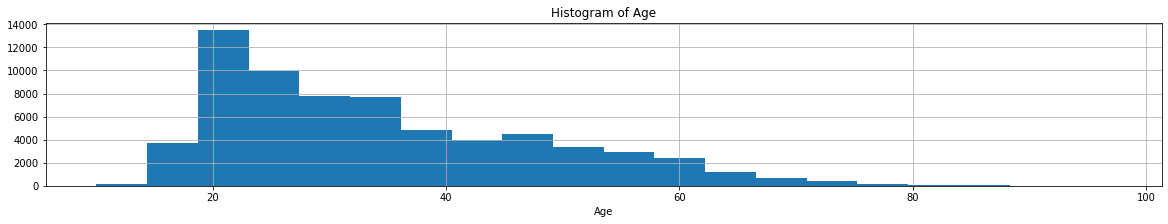

In [20]:
# plot histogram of age
# This matches our value counts of 25-30 being one of the highest areas
# 20-30 also seems like it is higher than other 10 year ranges
df_ca_final['subject_age'][df_ca_final['subject_age']>0].hist(bins=20, figsize=(20,3))
plt.pyplot.xlabel('Age')
plt.pyplot.title('Histogram of Age');

A histogram of the date variable: 

/Users/sarascomputer/anaconda2/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


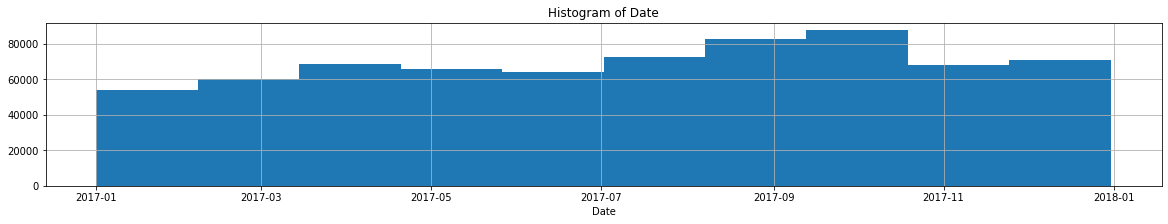

In [21]:
# plot histogram of date
df_ca_final['date'].hist(bins=10, figsize=(20,3))
plt.pyplot.xlabel('Date')
plt.pyplot.title('Histogram of Date');

Looking at the Percentage of Stops of Each Race in Each City

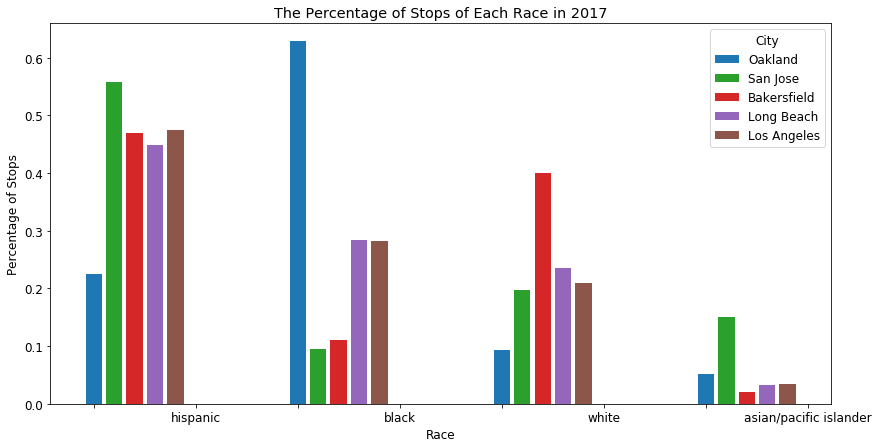

In [23]:
# The percentage of stops of each race in each city

# Updating graph and font sizes
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 12})

# creating a data subset that excludes stops where the driver race is listed as other or unknown
df_ca_final_race = df_ca_final[(df_ca_final['subject_race']!='other') & (df_ca_final['subject_race']!='unknown')]

# Helper Function to get the proportion of stops of drivers of each race
def get_proportions_race(df,races):
    lst = []
    for race in races: 
        lst.append(len(df['city'][df['subject_race']==race])/len(df['city']))
    return lst

# Helper Function to get the proportion of stops of drivers in each city
def get_proportions_city(df):
    races = ['hispanic','black','white','asian/pacific islander']
    index = 0
    # Changing the colors so they are the same for each city as the previous graph
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for city in df['city'].unique():
        plt.pyplot.bar(np.arange(4) * 10 + index, get_proportions_race(df_ca_final_race[df_ca_final_race['city']==city],races), color = colors[index])
        index = index + 1

# Plotting
fig, ax = plt.pyplot.subplots()
xlabels = [" "," ",'hispanic','', 'black','', 'white','', 'asian/pacific islander']

# Calling the functions
get_proportions_city(df_ca_final)

# Formatting the Plot
plt.pyplot.xlabel('Race')
plt.pyplot.ylabel('Percentage of Stops')
plt.pyplot.legend(title = "City",labels = df_ca_final_race['city'].unique())
ax.set_xticklabels(xlabels)
plt.pyplot.title('The Percentage of Stops of Each Race in 2017');
plt.pyplot.savefig('stops_by_race_17.jpg')

Looking at the Percentage of Stops of Each Gender in Each City

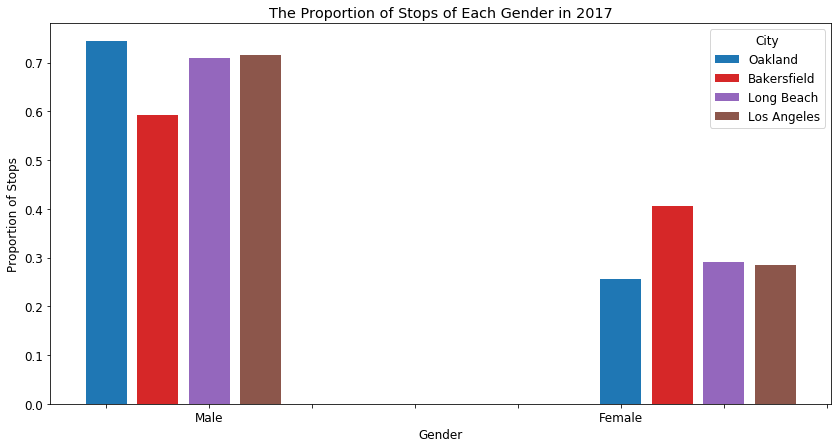

In [93]:
# The percentage of stops of each gender in each city

# creating a data subset that excludes stops where the driver gender is listed as 'N/A'
df_ca_final_gender = df_ca_final[(df_ca_final['subject_sex']=='male') | (df_ca_final['subject_sex']=='female')]

# Helper Function to get the proportion of stops of drivers of each gender
genders = ['male','female']
def get_proportions_gender(df,genders):
    lst = []
    for gender in genders: 
        lst.append(len(df['city'][df['subject_sex']==gender])/len(df['city']))
    return lst

# Helper Function to get the proportion of stops of drivers in each city
def get_proportions_city(df):
    colors = ['#1f77b4', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    index = 0
    for city in df['city'].unique():
        plt.pyplot.bar(np.arange(2) * 10 + index, get_proportions_gender((df[df['city']==city]),genders), color = colors[index])
        index = index + 1

# Creating the plot 
fig, ax = plt.pyplot.subplots()

# Calling functions
get_proportions_city(df_ca_final_gender)

Formatting the plot
plt.pyplot.xlabel('Gender')
plt.pyplot.ylabel('Proportion of Stops')
plt.pyplot.legend(title = "City",labels = df_ca_final_gender['city'].unique())
ax.set_xticklabels(['','','Male','','','','Female'])
plt.pyplot.title('The Proportion of Stops of Each Gender in 2017');
plt.pyplot.savefig('stops_by_gender_17.jpg')

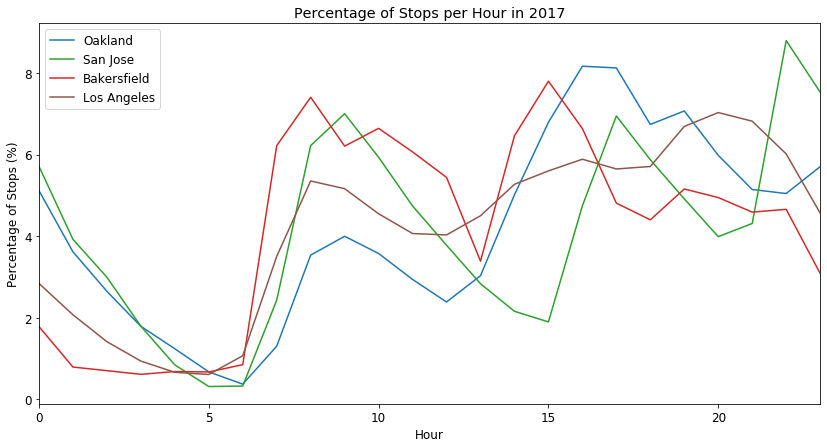

In [27]:
# Calculating what percentage of stops happen during each hour for each city

# Excluding stops where time is <0 (it is -1 when it is unknown or not available)
df_ca_time = df_ca_final[df_ca_final['hour']>=0]
cities = df_ca_time['city'].unique()
colors = ['#1f77b4', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
index = 0
for city in cities: 
    s1 = df_ca_time[(df_ca_time['city']==city) ]['hour'].value_counts(normalize=True).mul(100).sort_index()
    s1.plot(color = colors[index])
    index = index + 1
plt.pyplot.legend(df_ca_time['city'].unique())
plt.pyplot.xlabel('Hour')
plt.pyplot.ylabel('Percentage of Stops (%)')
plt.pyplot.title('Percentage of Stops per Hour in 2017');
plt.pyplot.savefig('stops_by_hour_17.jpg')

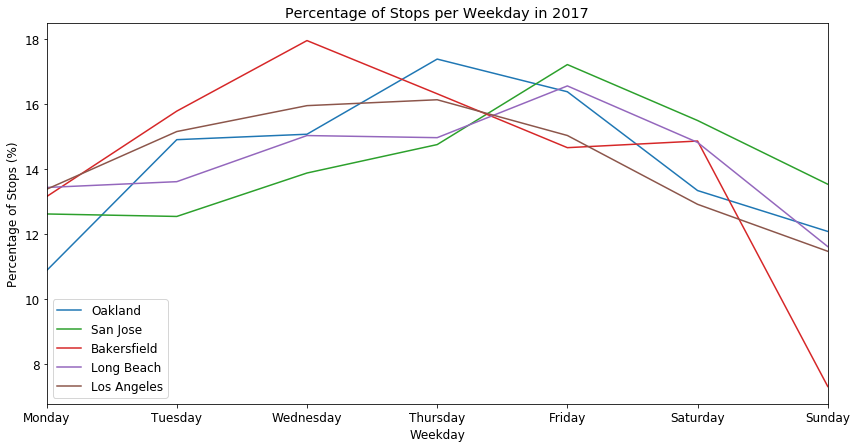

In [43]:
# Calculating what percentage of stops happen during each day of the week for each city
cities = df_ca_final['city'].unique()
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
index = 0
for city in cities: 
    s1 = df_ca_final[df_ca_final['city']==city]['weekday'].value_counts(normalize=True).mul(100).sort_index()
    s1.plot(color = colors[index])
    index = index +1
plt.pyplot.legend(df_ca_final['city'].unique())
plt.pyplot.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.pyplot.xlabel('Weekday')
plt.pyplot.ylabel('Percentage of Stops (%)')
plt.pyplot.title('Percentage of Stops per Weekday in 2017');
plt.pyplot.savefig('stops_by_weekday_17.jpg')